In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import glob

In [4]:
def split_8(img):
    borne = np.linspace(0,4096,9).astype('int')
    images = []
    for i in range(1,len(borne)):
        for j in range(1,len(borne)):
            image = img[borne[i-1]:borne[i],borne[j-1]:borne[j]]
            images.append(image)
    return np.array(images)

In [5]:
imgs = []

for i in range(2,17):
    try:
        filename = "{}.tif".format(str(i))
        img = cv2.imread(filename)
        img = cv2.resize(img,(4096,4096))
        img = split_8(img)
        imgs.append(img)
    except:
        continue


imgs = np.array(imgs)
imgs.shape

[ WARN:0@6.313] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('2.tif'): can't open/read file: check file path/integrity
[ WARN:0@6.314] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('3.tif'): can't open/read file: check file path/integrity
[ WARN:0@6.315] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('4.tif'): can't open/read file: check file path/integrity
[ WARN:0@6.315] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('5.tif'): can't open/read file: check file path/integrity
[ WARN:0@6.315] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('6.tif'): can't open/read file: check file path/integrity
[ WARN:0@15.258] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('15.tif'): can't open/read file: check file path/integrity
[ WARN:0@15.258] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) find

(8, 64, 512, 512, 3)

In [6]:
imgs[:-1][imgs[:-1] == 3] = 3
imgs[:-1][imgs[:-1] == 4] = 0
imgs[:-1][imgs[:-1] == 5] = 4
imgs[:-1][imgs[:-1] == 6] = 5
imgs[:-1][imgs[:-1] == 7] = 6
imgs[:-1][imgs[:-1] == 8] = 5
imgs[:-1][imgs[:-1] == 9] = 5
imgs[:-1][imgs[:-1] == 10] = 7
imgs[:-1][imgs[:-1] == 11] = 8
imgs[:-1][imgs[:-1] == 12] = 9
imgs[:-1][imgs[:-1] == 13] = 0
imgs[:-1][imgs[:-1] == 14] = 10
imgs[-1][imgs[-1] == 3] = 3
imgs[-1][imgs[-1] == 4] = 10
imgs[-1][imgs[-1] == 5] = 3
imgs[-1][imgs[-1] == 6] = 10
imgs[-1][imgs[-1] == 7] = 3
imgs[-1][imgs[-1] == 8] = 5
imgs[-1][imgs[-1] == 9] = 10
imgs[-1][imgs[-1] == 10] = 4
imgs[-1][imgs[-1] == 11] = 8
imgs[-1][imgs[-1] == 12] = 10
imgs[-1][imgs[-1] == 13] = 10
imgs[-1][imgs[-1] == 14] = 10

In [6]:
len(imgs.flatten())

402653184

In [7]:
print("falaise",len(imgs[imgs == 0])/len(imgs.flatten()))
print("batiment",len(imgs[imgs == 1])/len(imgs.flatten()))
print("route",len(imgs[imgs == 2])/len(imgs.flatten()))
print("pierrier",len(imgs[imgs == 3])/len(imgs.flatten()))
print("verger",len(imgs[imgs == 4])/len(imgs.flatten()))
print("cahmps",len(imgs[imgs == 5])/len(imgs.flatten()))
print("prairie",len(imgs[imgs == 6])/len(imgs.flatten()))
print("foret",len(imgs[imgs == 7])/len(imgs.flatten()))
print("foret claire",len(imgs[imgs == 8])/len(imgs.flatten()))
print("buison",len(imgs[imgs == 9])/len(imgs.flatten()))
print("eau",len(imgs[imgs == 10])/len(imgs.flatten()))

falaise 0.0752243772149086
batiment 0.1159665584564209
route 0.0328323170542717
pierrier 0.010571271181106567
verger 0.08712183684110641
cahmps 0.06893859058618546
prairie 0.10821046680212021
foret 0.3652436435222626
foret claire 0.09556961804628372
buison 0.023725800216197968
eau 0.016595520079135895


In [8]:
labels = imgs.flatten().reshape(512,512,512,3)

    - 0: falaise 0 

    - 1: batiment 1

    - 2: route 2
 
    - 3: pierrier 3

    - 4: falaise? 0

    - 5: verger 4

    - 6: champs 5

    - 7: Prairie 6

    - 8: champs 5

    - 9: champs 5

    - 10: forets 7

    - 11: foret claires 8

    - 12: buisson 9

    - 13: falaise 0 

    - 14: eau 10

In [9]:
def read(glob_name):
    paths = glob.glob("synthese/"+glob_name+"*")
    imgs = []
    for path in paths:
        img = cv2.imread(path)
        
        img1 = img[:512,:512]
        imgs.append(img1)

        img2 = img[:512,512:]
        imgs.append(img2)

        img3 = img[512:,:512]
        imgs.append(img3)

        img4 = img[512:,512:]
        imgs.append(img4)

    return np.array(imgs)

falaise = read("falaise")
batiment = read("batiment")
route = read("route")
pierrier = read("pierrier")
verger = read("verger")
champ = read("champ")
prairie = read("prairie")
foret = read("foret_")
foret_claire = read("foretclaire")
buisson = read("buisson")
eau = read("eau")

In [10]:
CLASSES = {0: falaise , 1: batiment, 2:route,3:pierrier,4:verger,
5:champ,6:prairie,7:foret,8:foret_claire,9:buisson,10:eau}

SIZE = (512,512,3)

In [11]:
import random

In [12]:
global_id = 0

def random_choice():
    falaise_id = random.choice(range(len(falaise)))
    batiment_id = random.choice(range(len(batiment)))
    route_id = random.choice(range(len(route)))
    pierrier_id = random.choice(range(len(pierrier)))
    verger_id = random.choice(range(len(verger)))
    champs_id = random.choice(range(len(champ)))
    prairie_id = random.choice(range(len(prairie)))
    foret_id = random.choice(range(len(foret)))
    foret_claire_id = random.choice(range(len(foret_claire)))
    buisson_id = random.choice(range(len(buisson)))
    eau_id = random.choice(range(len(eau)))

    return [falaise_id,batiment_id,route_id,pierrier_id,verger_id,
    champs_id,prairie_id,foret_id,foret_claire_id,buisson_id,eau_id]

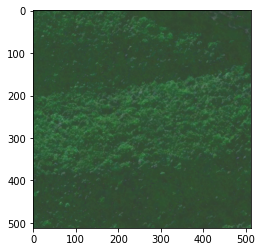

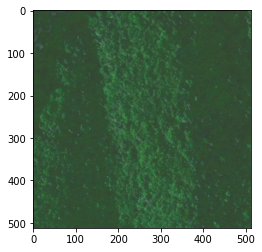

In [13]:
arr = random.choice([cv2.ROTATE_90_CLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_180])


im = foret[random_choice()[3]]
im_rotb = cv2.rotate(im, arr)

plt.imshow(im_rotb)
plt.show()

plt.imshow(im)
plt.show()


[0, 0, 2, 0, 6, 6, 3, 13, 3, 2, 0]
1
2
3
4
5
6
7


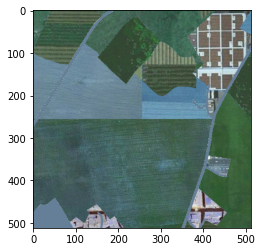

In [61]:
i = random.choice(range(len(labels)))
i=0


# on garde trace de toutes les classes présentes sur la carte
unique = np.unique(labels[0])
# on va tirer au hasard une image label pour chaque classe
random_choic = random_choice()
print(random_choic)

result = np.zeros(SIZE, dtype=np.uint8)


result = np.zeros(SIZE, dtype=np.uint8)

first_class_idx = unique[0]
classe_data = CLASSES[first_class_idx]

image = classe_data[random_choic[first_class_idx]]
# rot_img = image

# if random.uniform(0,1) > 0.25:
#     rd_rot = random.choice([cv2.ROTATE_90_CLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_180])
#     rot_img = cv2.rotate(im, rd_rot)

mask = np.zeros(SIZE, dtype=np.uint8)
mask[labels[i] == first_class_idx] = 255

result_tmp = cv2.bitwise_and(image, mask)
result = result_tmp


for j in unique[1:]:
    classe_data = CLASSES[j]
    classe_img = classe_data[random_choic[j]]
    
    # rot_img = classe_img

    # if random.uniform(0,1) > 0.25:
    #     rd_rot = random.choice([cv2.ROTATE_90_CLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_180])
    #     rot_img = cv2.rotate(im, rd_rot)
    
    mask = np.zeros(SIZE, dtype=np.uint8)
    mask[labels[0] == i] = 255

    result_tmp = cv2.bitwise_and(classe_img, mask)
    result = cv2.bitwise_or(result,result_tmp)

# cv2.imwrite(labels[i],"synthese2/masks/{}.png".format(str(i)))
# cv2.imwrite(result,"synthese2/images/{}.png".format(str(i)))
print(i)

plt.imshow(result)
plt.show()

In [155]:
for i in range(len(labels)):
    # on garde trace de toutes les classes présentes sur la carte
    unique = np.unique(labels[i])
    # on va tirer au hasard une image label pour chaque classe
    random_choic = random_choice()

    result = np.zeros(SIZE, dtype=np.uint8)

    first_class_idx = unique[0]
    classe_data = CLASSES[first_class_idx]

    image = classe_data[random_choic[first_class_idx]]
    rot_img = image

    if random.uniform(0,1) > 0.25:
        rd_rot = random.choice([cv2.ROTATE_90_CLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_180])
        rot_img = cv2.rotate(image, rd_rot)

    mask = np.zeros(SIZE, dtype=np.uint8)
    mask[labels[i] == first_class_idx] = 255

    result_tmp = cv2.bitwise_and(rot_img, mask)
    result = result_tmp


    for j in unique[1:]:
        classe_data = CLASSES[j]
        classe_img = classe_data[random_choic[j]]

        rot_img = classe_img

        if random.uniform(0,1) > 0.25:
            rd_rot = random.choice([cv2.ROTATE_90_CLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_180])
            rot_img = cv2.rotate(classe_img, rd_rot)
        
        mask = np.zeros(SIZE, dtype=np.uint8)
        mask[labels[i] == j] = 255

        result_tmp = cv2.bitwise_and(rot_img, mask)
        result = cv2.bitwise_or(result,result_tmp)

    cv2.imwrite("synthese2/masks/{}.png".format(str(i)),labels[i])
    cv2.imwrite("synthese2/images/{}.png".format(str(i)),result)

In [ ]:
 # on garde trace de toutes les classes présentes sur la carte
    unique = np.unique(label)
    # on va tirer au hasard une image label pour chaque classe
    random_choic = random_choice()
    print(random_choic)

    result = np.zeros(SIZE, dtype=np.uint8)

    first_class_idx = unique[0]
    classe_data = CLASSES[first_class_idx]

    image = classe_data[random_choic[first_class_idx]]
    rot_img = image
    
    if random.uniform(0,1) > 0.25:
        rd_rot = random.choice([cv2.ROTATE_90_CLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_180])
        rot_img = cv2.rotate(im, rd_rot)
    
    mask = np.zeros(SIZE, dtype=np.uint8)
    mask[label == first_class_idx] = 255

    result_tmp = cv2.bitwise_and(rot_img, mask)
    result = result_tmp


    for i in unique[1:]:
        classe_data = CLASSES[i]
        print(i)
        classe_img = classe_data[random_choic[i]]
        rot_img = classe_img

        if random.uniform(0,1) > 0.25:
            rd_rot = random.choice([cv2.ROTATE_90_CLOCKWISE,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_180])
            rot_img = cv2.rotate(im, rd_rot)
        
        mask = np.zeros(SIZE, dtype=np.uint8)
        mask[label == i] = 255

        result_tmp = cv2.bitwise_and(rot_img, mask)
        result = cv2.bitwise_or(result,result_tmp)
    
    cv2.imwrite(label[i],"synthese2/masks/{}.png".format(str(i)))
    cv2.imwrite(result,"synthese2/images/{}.png".format(str(i)))

In [ ]:
# on garde trace de toutes les classes présentes sur la carte
unique = np.unique(labels[0])
# on va tirer au hasard une image label pour chaque classe
random_choic = random_choice()

result = np.zeros(SIZE, dtype=np.uint8)

first_class_idx = unique[0]
classe_data = CLASSES[first_class_idx]

image = classe_data[random_choic[first_class_idx]]
mask = np.zeros(SIZE, dtype=np.uint8)
mask[labels[0] == first_class_idx] = 255

result_tmp = cv2.bitwise_and(image, mask)
result = result_tmp


for i in unique[1:]:
    classe_data = CLASSES[i]
    classe_img = classe_data[random_choic[i]]
    
    mask = np.zeros(SIZE, dtype=np.uint8)
    mask[labels[0] == i] = 255

    result_tmp = cv2.bitwise_and(classe_img, mask)
    result = cv2.bitwise_or(result,result_tmp)

plt.imshow(result[...,::-1])
plt.show()